<a href="https://colab.research.google.com/github/manigs2007/netflix_eda/blob/main/netflix_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Netflix** is a subscription based streaming services that allows members to watch TV Shows and Movies on an internet connected device. It is availlable for streaming in more than 190 countries.
### However in India, it is yet to become the numero uno when it comes to the OTT platforms. There is a large competition and other platforms are doing much better than Netflix.
### The objective of this exploratory data analysis is to find what drives Netflix. What is its content, likeablity factors, striking trends and also if there is any scope of improvement. **The main goal is to draw some conclusions from the insights to further improve Netflix presence in India.**

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# loading the data into DataFrame

df = pd.read_csv('/content/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# finding shape of the file

print(df.shape)

(8807, 12)


In [ ]:
# finding dimensions of the file

print(df.ndim)

2


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
# finding different columns and their datatypes that are present in the data

print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
# statistical summary about columns (containing purely integer or float values)

print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
# finding missing values in the columns

df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# finding out missing values by percentage

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace = True, ascending = False)
print(round(missing_value_df,2))

              percent_missing
director                29.91
country                  9.44
cast                     9.37
date_added               0.11
rating                   0.05
duration                 0.03
show_id                  0.00
type                     0.00
title                    0.00
release_year             0.00
listed_in                0.00
description              0.00


In [ ]:
# finding the number of Movies and TV Shows on Netflix

df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df.type.value_counts(normalize = True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

* Around 69% of the content on Netflix is Movies while rest of it are TV shows(31%)

In [ ]:
# finding top 5 content contributing country

df['country'].value_counts()[:5]

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

In [ ]:
df['country'].value_counts(normalize = True)[:5]

United States     0.353310
India             0.121866
United Kingdom    0.052533
Japan             0.030717
South Korea       0.024950
Name: country, dtype: float64

* Around 35% of the content on Netflix is contributed by Movies and Shows produced in United States. India is second with 12% of the content followed by United Kingdom, Japan and Korea.

In [ ]:
# top 5 rating of the content

df.rating.value_counts()[:5]

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

In [ ]:
df.rating.value_counts(normalize = True)[:5]

TV-MA    0.364308
TV-14    0.245371
TV-PG    0.098035
R        0.090765
PG-13    0.055663
Name: rating, dtype: float64

* Around 36% of the content is intended for "Mature Audience". Children aged 17 and younger are neither expected nor encouraged to watch these content.

* TV-14 content has the second largest presence on Netflix with 24% of the content. These shows are good for viewers aged 14 and above.

* Shows with "Parental Guidance" have the third largest presence in Netflix. These shows are expected to be watched under parental guidance as they might contain mature content.

In [ ]:
# Top 5 Directors

df["director"].value_counts().head()

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: director, dtype: int64

#### Separating Movies and TV Shows Cast

In [ ]:
movie_mask = (df['type'] == "Movie")
movies = df[movie_mask].reset_index().drop(['index', 'show_id', 'show_id', 'type', 'date_added',
                        'release_year', 'duration', 'description'], axis=1)
movies.head()

,title,director,cast,country,rating,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,PG-13,Documentaries
1,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,PG,Children & Family Movies
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",TV-MA,"Dramas, Independent Movies, International Movies"
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,PG-13,"Comedies, Dramas"
4,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",TV-MA,"Dramas, International Movies"


#### Most frequently casted actors in movies

In [ ]:
# Analysis of Movies Cast
movies_cast = dict()
for listed in movies['cast'].dropna().values:
  for cast in listed.split(','):
    if cast in movies_cast:
      movies_cast[str(cast).strip()] += 1
    else:
      movies_cast[str(cast).strip()] = 1

In [ ]:
movies_cast = sorted(movies_cast.items(), key=lambda x:x[1], reverse=True)
movies_cast[:5]

[('Adam Sandler', 20),
 ('Vatsal Dubey', 16),
 ('Ahmed Helmy', 13),
 ('Samuel West', 11),
 ('Eddie Murphy', 10)]

* **Adam Sandler** is the most featured actor in contents of Netflix.

#### Most frequent Movies director

In [ ]:
# Analysis of Movies Director

movies_director = dict()
for listed in movies['director'].dropna().values:
  for director in listed.split(','):
    if director in movies_director:
      movies_director[str(director).strip()] += 1
    else:
      movies_director[str(director).strip()] = 1

In [ ]:
movies_director = sorted(movies_director.items(), key=lambda x:x[1], reverse=True)
movies_director[:5]

[('Rajiv Chilaka', 22),
 ('Suhas Kadav', 16),
 ('Jay Karas', 15),
 ('Marcus Raboy', 15),
 ('Cathy Garcia-Molina', 13)]

* Content directed by **Rajiv Chilaka** has the maximum presence on Netflix.

#### Most frequent Genres in Movies

In [ ]:
# Analysis of Genres

movies_genre = dict()
for listed in movies['listed_in'].dropna().values:
  for genre in listed.split(','):
    if genre in movies_genre:
      movies_genre[str(genre).strip()] += 1
    else:
      movies_genre[str(genre).strip()] = 1

In [ ]:
movies_genre = sorted(movies_genre.items(), key=lambda x:x[1], reverse=True)
movies_genre[:5]

[('Action & Adventure', 859),
 ('Movies', 57),
 ('Stand-Up Comedy', 26),
 ('Documentaries', 19),
 ('Children & Family Movies', 5)]

* **Action & Adventure** is the most preferred genre on Netflix.

#### Similar analysis of TV Shows

In [ ]:
tv_mask = (df['type'] == "TV Show")
tv = df[tv_mask].reset_index().drop(['index', 'show_id', 'show_id', 'type', 'date_added',
                        'release_year', 'duration', 'description'], axis=1)
tv.head()

,title,director,cast,country,rating,listed_in
0,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
2,Jailbirds New Orleans,NaN,NaN,NaN,TV-MA,"Docuseries, Reality TV"
3,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
4,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,TV-MA,"TV Dramas, TV Horror, TV Mysteries"


#### Most frequently casted actors in TV Shows

In [ ]:
# Analysis of TV Show Cast

tv_cast = dict()
for listed in tv['cast'].dropna().values:
  for cast in listed.split(','):
    if cast in tv_cast:
      tv_cast[str(cast).strip()] += 1
    else:
      tv_cast[str(cast).strip()] = 1

In [ ]:
tv_cast = sorted(tv_cast.items(), key=lambda x:x[1], reverse=True)
tv_cast[:5]

[('David Attenborough', 14),
 ('Michela Luci', 7),
 ('Tara Strong', 4),
 ('You', 4),
 ('Natsuki Hanae', 4)]

* **David Attenborough** features in most of the shows.

#### Most frequent TV Shows directors

In [ ]:
# Analysis of TV Director
tv_director = dict()
for listed in tv['director'].dropna().values:
  for director in listed.split(','):
    if director in tv_director:
      tv_director[str(director).strip()] += 1
    else:
      tv_director[str(director).strip()] = 1


In [ ]:
tv_director = sorted(tv_director.items(), key=lambda x:x[1], reverse=True)
tv_director[:5]

[('Alastair Fothergill', 3),
 ('Ken Burns', 3),
 ('Hsu Fu-chun', 2),
 ('Rob Seidenglanz', 2),
 ('Joe Berlinger', 2)]

* Alastair Fothergill is the most featured director in TV Shows.

#### Most frequent TV Show Genre

In [ ]:
# Analysis of TV Genre

tv_genre = dict()
for listed in tv['listed_in'].dropna().values:
  for genre in listed.split(','):
    if genre in tv_genre:
      tv_genre[str(genre).strip()] += 1
    else:
      tv_genre[str(genre).strip()] = 1

In [ ]:
tv_genre = sorted(tv_genre.items(), key=lambda x:x[1], reverse=True)
tv_genre[:5]

[('British TV Shows', 253),
 ('Anime Series', 176),
 ('TV Shows', 16),
 ('International TV Shows', 8),
 ("Kids' TV", 3)]

* **British TV Shows** has the maximum presence on Netflix.

#### General features such date_added, release_year, duration etc.

In [ ]:
df['date_added'].value_counts()[:5]

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
Name: date_added, dtype: int64

* January is the most preferred month for any content to be released, followed by November.

In [ ]:
df['release_year'].value_counts()[:5]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64



*   2018 was the year when most of the content was uploaded on Netflix



In [ ]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

* Maximum TV Shows ran for 1 season only.
* Most of the Movies had a playing time of 90 minutes.

## Adjusting data types and filling in missing values

### The following do not require any fills:
*   show_id
*   type
*   title
*   release_year
*   listed_in
*   description

### The following columns have some missing values:
*   director
*   cast
*   country
*   date_added
*   rating  
*   duration

In [ ]:
# We see that apart from three columns "director", "cast" and "country", we dont have any column with a significant missing values percentage.
# We will be imputing the missing values
# replacing NaN values with 'Unavailable' in some of the columns

df.fillna({'rating':'Unavailable', 'cast':'Unavailable', 'country':'Unavailable', 'director':'Unavailable'}, inplace = True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
# converting the data type of date_added from object to datetime64

df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# For 'date_added' column we are substituting missing values with the most recent date from the column.

df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
most_recent_entry_date = df['date_added'].max()
df.fillna({'date_added' : most_recent_entry_date}, inplace = True)

<ipython-input-40-95324eb3b57c>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna({'date_added' : most_recent_entry_date}, inplace = True)


In [ ]:
# checking a value that previously had an invalid 'date_added' entry

df[df.show_id == 's6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


* date column has been fixed

In [ ]:
# finding null values in 'duration' column and imputing it accordingly

df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# after observing the above data we see that the entries for 'duration' column seems to have been mistakenly added in the 'rating' column instead.
# checking to make sure there is no data in the name of director 'Louis C. K.' to avoid accidental overwriting.

df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# overwrite and check

df.loc[df['director'] == 'Louis C.K.', 'duration'] = df['rating']
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
# Checking the missing values after doing all the imputation

df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Visualization

In [ ]:
# finding the type of content present on Netflix

df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

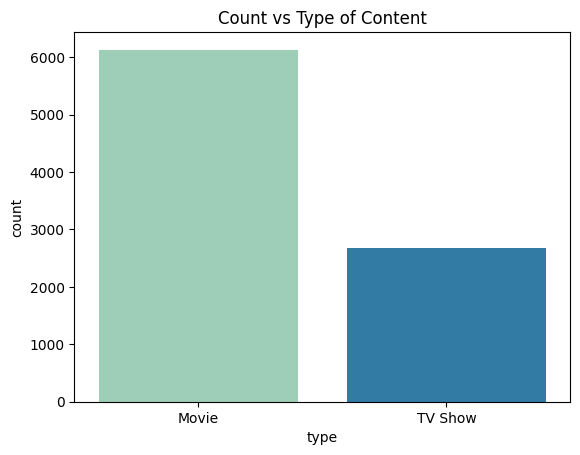

In [ ]:
# finding countplot of type of content on Netflix

sns.countplot(x = 'type', data = df, palette = 'YlGnBu')
plt.title("Count vs Type of Content")
plt.show()

In [ ]:
# country analysis

df['country'].value_counts().head(10)

United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

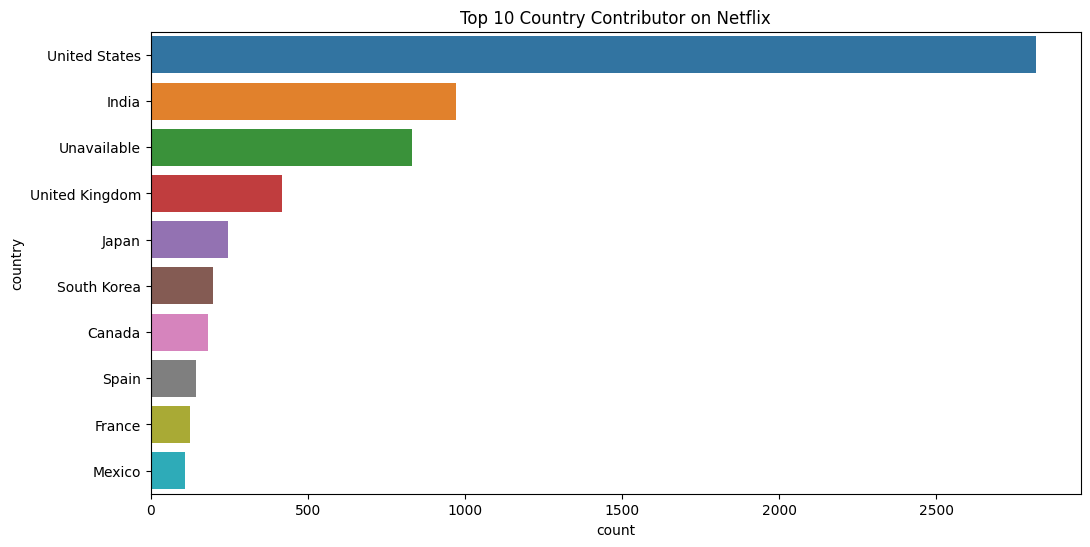

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10], data = df)
plt.title("Top 10 Country Contributor on Netflix")
plt.show()

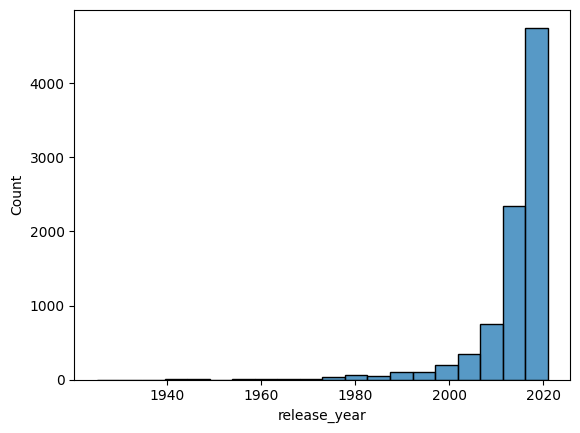

In [ ]:
# histplot of 'release_year'

sns.histplot(x = "release_year", data = df, bins = 20)
plt.show()

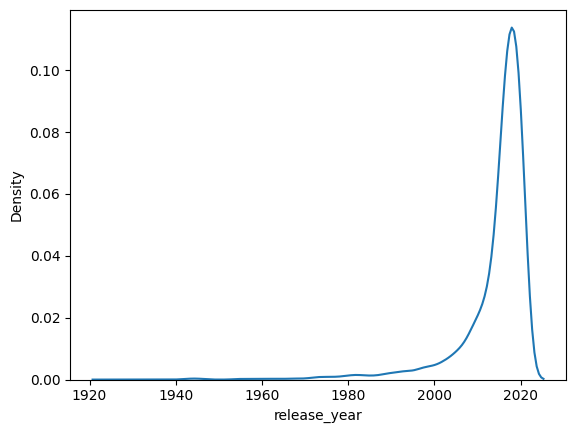

In [ ]:
sns.kdeplot(x="release_year", data = df)
plt.show()

* Trend and data analysis shows that uploading of content on Netflix took a major acceleration from 2016 onwards that peaked in 2018. There has been a significance updation of content since then.

In [ ]:
# type of content based on country

movies_countries = df[df['type'] == 'Movie']
tv_show_countries = df[df['type'] == 'TV Show']

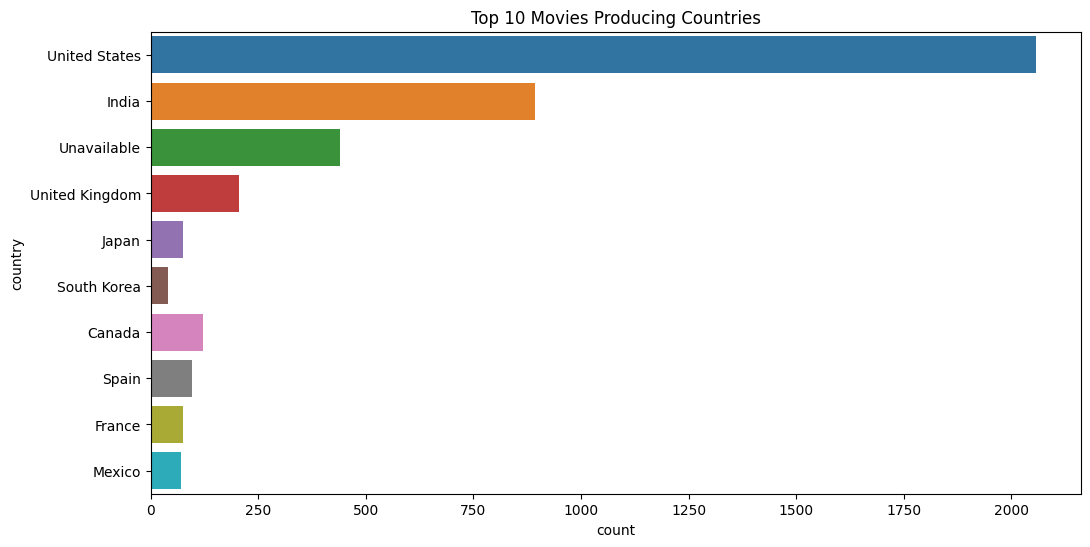

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10], data = movies_countries)
plt.title("Top 10 Movies Producing Countries")
plt.show()

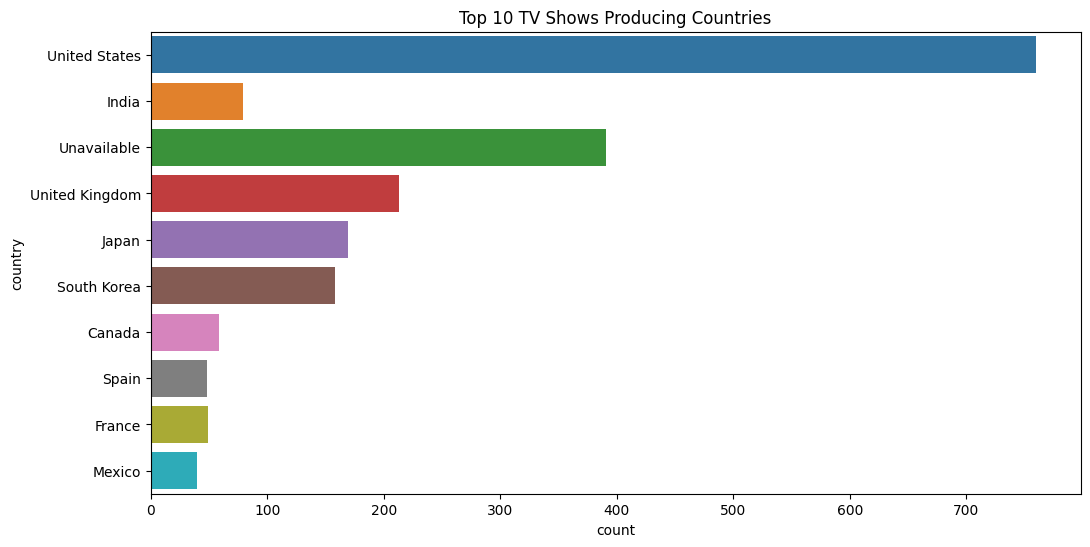

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(y = 'country', order = df['country'].value_counts().index[0:10], data = tv_show_countries)
plt.title("Top 10 TV Shows Producing Countries")
plt.show()

In [ ]:
df.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
TV-Y7-FV          6
Unavailable       4
NC-17             3
UR                3
74 min            1
84 min            1
66 min            1
Name: rating, dtype: int64

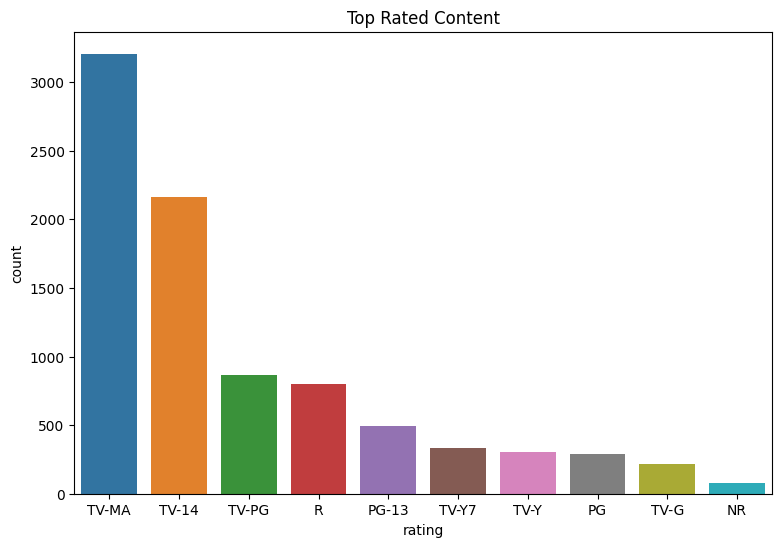

In [ ]:
plt.figure(figsize = (9, 6))
sns.countplot(x = 'rating', order = df['rating'].value_counts().index[0:10], data = df)
plt.title("Top Rated Content")
plt.show()

In [ ]:
df.release_year.value_counts()[0:20]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

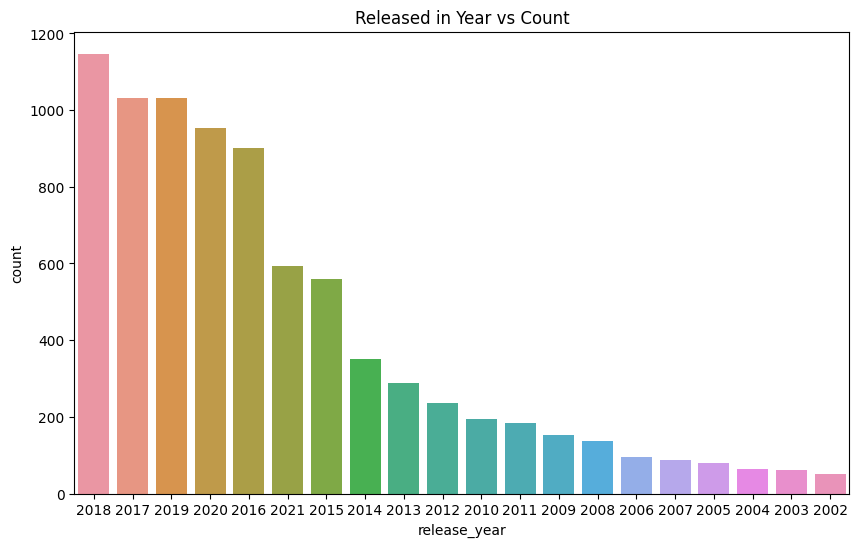

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'release_year', order = df['release_year'].value_counts().index[0:20], data = df)
plt.title("Released in Year vs Count")
plt.show()

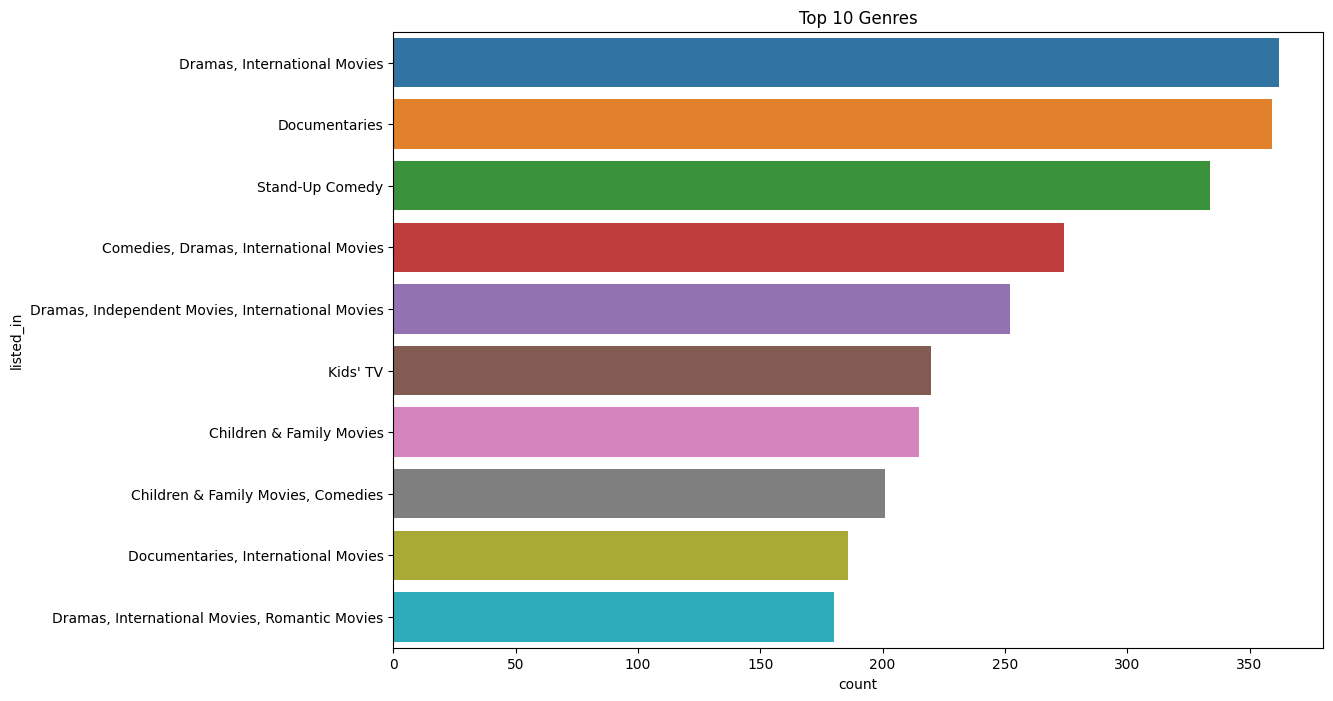

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(y = 'listed_in', order = df['listed_in'].value_counts().index[0:10], data = df)
plt.title("Top 10 Genres")
plt.show()

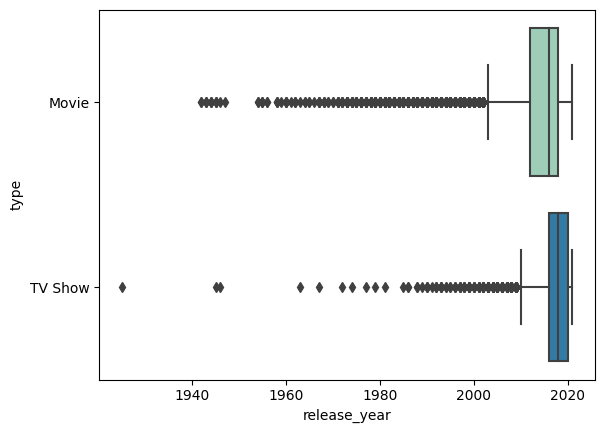

In [ ]:
sns.boxplot(data=df, x='release_year', y='type', palette="YlGnBu")
plt.show()

* From the data, it looks like we have few outliers in T.V Show release year i.e., starts from 1925, then 2 data points in the range of 1940s-1960s. While, in movies, we can few movies being released in the 1940s-1950s.

## Insights
* Most of the content is available in the form of Movies having duration of 90 mins (1.5 Hrs).
* Majority content is coming from United States & United Kingdom.
* In Movies, most popular genre is Action & Adventure. In TV Shows, most popular genre is British T.V Shows.
* Most of the content was uploaded during the year of 2018-2021.
* TV-MA is the most popular rating among other ratings.
* Most movies are available in 90 min duration, while T.V Shows are available in single season.

## Recommendations
* Netflix could widen its presence if they can tap the rural audience by dubbing the already present popular content like "Money Heist", "S.W.A.T." in local languages like Hindi, Tamil, Telugu etc.
* Add local payment wallet methods to buy Netflix subscription. Like Paytm, PhonePe, Mobikwik etc.
* Develop more local Indian content.
* Partner with YouTube influencers to create content in Indian languages for Netflix Mobile which is the most preferred option of subscribers.